In [1]:
import numpy as np
import matplotlib.pyplot as plt

import mat73
import py7zr

# archive = py7zr.SevenZipFile('/Users/mayur/Downloads/20210713_1345.zstd.7z', mode='r')
# archive.extractall(path="/Users/mayur/Downloads/")
# archive.close()
# Load the MATLAB file
data = mat73.loadmat('/Users/mayur/Downloads/20210602_1136.mat')


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
s0 = data['S0int']
s1 = data['S1int']
s2 = data['S2int']

In [3]:
s0 , s1, s2 = s0[:500,1000:1600,50:60],s1[:500,1000:1600,50:60],s2[:500,1000:1600,50:60]
LL=np.zeros([500,1000,10])
DOLP = np.zeros([500,1000,10])


S0_normalized = np.ones_like(s0)

s_n = np.sqrt(s1**2 + s2**2)

# Normalize S1, S2, S3
s1_norm = s1 / s_n
s2_norm = s2 / s_n
# s0_norm = s0 / s0

# Clip the normalized values to ensure they fall within the range [-1, 1]
s1_normalized = np.clip(s1_norm, -1, 1)
s2_normalized = np.clip(s2_norm, -1, 1)


/var/folders/8t/cg46ygc52xq8ts0rysyjhfn40000gn/T/ipykernel_1568/3572307030.py:8: RuntimeWarning: invalid value encountered in sqrt
  s_n = np.sqrt(s1**2 + s2**2)
/var/folders/8t/cg46ygc52xq8ts0rysyjhfn40000gn/T/ipykernel_1568/3572307030.py:11: RuntimeWarning: divide by zero encountered in divide
  s1_norm = s1 / s_n
/var/folders/8t/cg46ygc52xq8ts0rysyjhfn40000gn/T/ipykernel_1568/3572307030.py:11: RuntimeWarning: invalid value encountered in divide
  s1_norm = s1 / s_n
/var/folders/8t/cg46ygc52xq8ts0rysyjhfn40000gn/T/ipykernel_1568/3572307030.py:12: RuntimeWarning: divide by zero encountered in divide
  s2_norm = s2 / s_n
/var/folders/8t/cg46ygc52xq8ts0rysyjhfn40000gn/T/ipykernel_1568/3572307030.py:12: RuntimeWarning: invalid value encountered in divide
  s2_norm = s2 / s_n


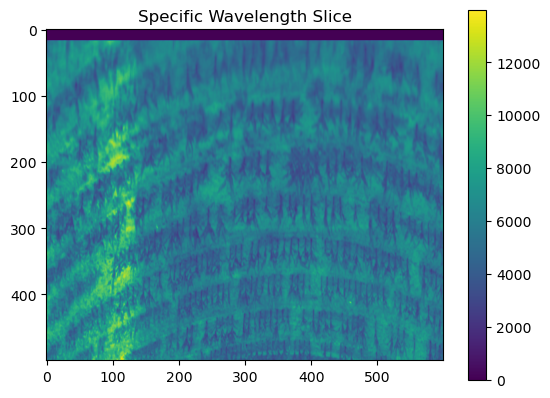

In [4]:
plt.imshow(s0[:,:,0])
plt.colorbar()
plt.title('Specific Wavelength Slice')
plt.show()

In [5]:
print(s0.shape)
for i in range(500):
    for j in range(600):
        for k in range(10):
            if ~np.isnan(s1[i][j][k].all()) and ~np.isnan(s2[i][j][k].all()) and ~np.isnan(s0[i][j][k].all()) and s0[i][j][k]**2 >= s1[i][j][k]**2 + s2[i][j][k]**2:
                LL[i][j][k] =np.sqrt(s1[i][j][k]**2+s2[i][j][k]**2)
                DOLP[i][j][k] = LL[i][j][k]/s0[i][j][k]


print(LL.shape,"shapee",s0.shape)

# print(s2[~np.isnan(s2)]**2,"555555")
# V = LL[~np.isnan(LL)]
# print(V,"**************")

# Calculate angle of polarization (AOP)
print(DOLP[~np.isnan(DOLP)].shape)
DOLP = DOLP[~np.isnan(DOLP)]

(500, 600, 10)


/var/folders/8t/cg46ygc52xq8ts0rysyjhfn40000gn/T/ipykernel_1568/253824880.py:7: RuntimeWarning: invalid value encountered in scalar divide
  DOLP[i][j][k] = LL[i][j][k]/s0[i][j][k]


(500, 1000, 10) shapee (500, 600, 10)
(4897400,)


In [6]:
AOP = 0.5 * np.arctan2(s0, s1)
print(DOLP.shape)

circular_threshold = 0.99  # Adjust as needed based on your requirements

# Calculate statistics for DOLP and AOP across the entire image
mean_DOLP = np.mean(DOLP)
mean_AOP = np.mean(AOP)
print(mean_DOLP,"--",mean_AOP)
polarization_state = ""
if mean_DOLP <= circular_threshold:
    # Circular polarization
    polarization_state = "Circular"
elif mean_DOLP < 1:
    # Linear or elliptical polarizat\ion
    polarization_state = "Linear or Elliptical"

# Print the predominant polarization state
print("Predominant polarization state:", polarization_state)

(4897400,)
0.039629700782934596 -- 0.7485261
Predominant polarization state: Circular
